 # 1. 기존의 프로그램 방식
 
- [linear regression 설명 사이트](https://gbhat.com/machine_learning/linear_regression.html)
- [오차함수 : 오차제곱평균 ), 루트를 취하기 때문에 MSE 의 단점이 어느정도 해소 . 이상치에 덜 민감 ),
     MAE(mean absolute erro error ; 절대값평균 )](https://jysden.medium.com/%EC%96%B8%EC%A0%9C-mse-maermse%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94%EA%B0%80-c473bd831c62)
![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*XRXgMqrr5rq-V1rW7SkrtA.png)

- [경사하강법 설명](https://www.mql5.com/ko/articles/11200)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 섭씨온도(input_data)를 받아 화씨온도로 출력
def celsisu_to_faherenheit(c):
    return c * 1.8 + 32

In [3]:
input_c = int(input('섭씨 온도 : '))
print('화씨온도 :',celsisu_to_faherenheit(input_c))

섭씨 온도 : 0
화씨온도 : 32.0


# 2. 머신러닝 프로그램 방식
- 1. 데이터 확보 및 생성(inputdata, outputdata)
- 2. 데이터 전처리 (결측치, 스케일조정, 훈련데이터셋과 검증데이터셋, 시험데이터셋으로 분류..)
- 3. 모델 구성
- 4. 모델 학습 과정 설정(손실 함수, 옵티마이저, 평가지표)
- 5. 모델 학습 시키기
- 6. 모델 평가(시험데이터셋으로)
- 7. 모델 사용(모델 저장 후, 저장된 모델을 이용하여, 입력값이 주어지면 예측값 받기)
## 2.1 노이즈가 없는 데이터로 실습

In [4]:
# 1. 데이터 생성
data_c = np.arange(100)
data_c # 독립변수 (input_data)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [5]:
data_f = celsisu_to_faherenheit(data_c)
data_f # 종속변수(타겟변수, output_data)

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [6]:
# 2. 데이터 전처리 : 컴퓨터에게 학습시키기 위해 스케일을 맞춤(전체의 편차를 비슷하게) normalize함
scaled_data_c = data_c/100
scaled_data_f = data_f/100

In [7]:
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.10.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
# 3. 모델 구성
# pip install tenserflow==2.10
from tensorflow.keras.models import Sequential # 모델 생성
from tensorflow.keras.layers import Dense # 입력값과 출력값으로 layer 층 지정

model = Sequential()
# mode1.add(Input(shape=1))
model.add(Dense(units=1, # 종속(타겟, 출력)변수의 갯수
               input_shape=(1,), # 독립(입력)변수의 shape
               )) #모델에 layer를 추가

In [9]:
# 4. 모델 학습과정 설정(손실함수, 옵티마이저, 평가지표)
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
# 학습하기 전 예측
model.predict(np.array([[0],
                      [0.01]]))

1/1 [==============================] - 1s 994ms/step


array([[0.        ],
       [0.01142074]], dtype=float32)

In [11]:
model.save('model/before_learning.h5')

In [12]:
# 5. 학습시키기
hist = model.fit(scaled_data_c,  # 독립변수(훈련데이터)
                 scaled_data_f,  # 종속변수(훈련데이터)
                 epochs=1000,    # 학습 횟수
                 verbose=2,      # 학습 시 출력 여부(학습결과)
                )

Epoch 1/1000
4/4 - 0s - loss: 0.4467 - mae: 0.6411 - 365ms/epoch - 91ms/step
Epoch 2/1000
4/4 - 0s - loss: 0.4311 - mae: 0.6295 - 15ms/epoch - 4ms/step
Epoch 3/1000
4/4 - 0s - loss: 0.4216 - mae: 0.6223 - 20ms/epoch - 5ms/step
Epoch 4/1000
4/4 - 0s - loss: 0.4123 - mae: 0.6151 - 13ms/epoch - 3ms/step
Epoch 5/1000
4/4 - 0s - loss: 0.4041 - mae: 0.6088 - 16ms/epoch - 4ms/step
Epoch 6/1000
4/4 - 0s - loss: 0.3960 - mae: 0.6025 - 16ms/epoch - 4ms/step
Epoch 7/1000
4/4 - 0s - loss: 0.3876 - mae: 0.5959 - 15ms/epoch - 4ms/step
Epoch 8/1000
4/4 - 0s - loss: 0.3799 - mae: 0.5897 - 14ms/epoch - 4ms/step
Epoch 9/1000
4/4 - 0s - loss: 0.3730 - mae: 0.5842 - 16ms/epoch - 4ms/step
Epoch 10/1000
4/4 - 0s - loss: 0.3654 - mae: 0.5780 - 15ms/epoch - 4ms/step
Epoch 11/1000
4/4 - 0s - loss: 0.3584 - mae: 0.5722 - 13ms/epoch - 3ms/step
Epoch 12/1000
4/4 - 0s - loss: 0.3513 - mae: 0.5664 - 13ms/epoch - 3ms/step
Epoch 13/1000
4/4 - 0s - loss: 0.3447 - mae: 0.5608 - 13ms/epoch - 3ms/step
Epoch 14/1000
4/4 -

Epoch 109/1000
4/4 - 0s - loss: 0.0061 - mae: 0.0657 - 11ms/epoch - 3ms/step
Epoch 110/1000
4/4 - 0s - loss: 0.0057 - mae: 0.0641 - 9ms/epoch - 2ms/step
Epoch 111/1000
4/4 - 0s - loss: 0.0054 - mae: 0.0627 - 11ms/epoch - 3ms/step
Epoch 112/1000
4/4 - 0s - loss: 0.0052 - mae: 0.0615 - 10ms/epoch - 2ms/step
Epoch 113/1000
4/4 - 0s - loss: 0.0049 - mae: 0.0603 - 9ms/epoch - 2ms/step
Epoch 114/1000
4/4 - 0s - loss: 0.0047 - mae: 0.0588 - 11ms/epoch - 3ms/step
Epoch 115/1000
4/4 - 0s - loss: 0.0045 - mae: 0.0578 - 10ms/epoch - 3ms/step
Epoch 116/1000
4/4 - 0s - loss: 0.0043 - mae: 0.0567 - 10ms/epoch - 2ms/step
Epoch 117/1000
4/4 - 0s - loss: 0.0041 - mae: 0.0556 - 11ms/epoch - 3ms/step
Epoch 118/1000
4/4 - 0s - loss: 0.0040 - mae: 0.0548 - 10ms/epoch - 3ms/step
Epoch 119/1000
4/4 - 0s - loss: 0.0039 - mae: 0.0542 - 11ms/epoch - 3ms/step
Epoch 120/1000
4/4 - 0s - loss: 0.0038 - mae: 0.0537 - 11ms/epoch - 3ms/step
Epoch 121/1000
4/4 - 0s - loss: 0.0037 - mae: 0.0527 - 10ms/epoch - 3ms/step
E

Epoch 212/1000
4/4 - 0s - loss: 9.6708e-07 - mae: 9.3804e-04 - 17ms/epoch - 4ms/step
Epoch 213/1000
4/4 - 0s - loss: 3.2922e-07 - mae: 5.6125e-04 - 11ms/epoch - 3ms/step
Epoch 214/1000
4/4 - 0s - loss: 3.7537e-07 - mae: 6.0096e-04 - 10ms/epoch - 2ms/step
Epoch 215/1000
4/4 - 0s - loss: 3.7140e-07 - mae: 5.8884e-04 - 10ms/epoch - 2ms/step
Epoch 216/1000
4/4 - 0s - loss: 1.1628e-06 - mae: 0.0011 - 10ms/epoch - 2ms/step
Epoch 217/1000
4/4 - 0s - loss: 3.1901e-07 - mae: 5.5319e-04 - 10ms/epoch - 3ms/step
Epoch 218/1000
4/4 - 0s - loss: 5.7767e-07 - mae: 7.4436e-04 - 11ms/epoch - 3ms/step
Epoch 219/1000
4/4 - 0s - loss: 5.4334e-07 - mae: 7.2356e-04 - 12ms/epoch - 3ms/step
Epoch 220/1000
4/4 - 0s - loss: 7.3860e-07 - mae: 8.4303e-04 - 10ms/epoch - 2ms/step
Epoch 221/1000
4/4 - 0s - loss: 3.1771e-07 - mae: 5.5221e-04 - 10ms/epoch - 2ms/step
Epoch 222/1000
4/4 - 0s - loss: 4.8833e-07 - mae: 6.7788e-04 - 11ms/epoch - 3ms/step
Epoch 223/1000
4/4 - 0s - loss: 3.6924e-07 - mae: 5.8208e-04 - 11ms/e

4/4 - 0s - loss: 3.5470e-07 - mae: 5.7554e-04 - 11ms/epoch - 3ms/step
Epoch 310/1000
4/4 - 0s - loss: 4.4672e-07 - mae: 6.5623e-04 - 11ms/epoch - 3ms/step
Epoch 311/1000
4/4 - 0s - loss: 4.6323e-07 - mae: 6.6613e-04 - 11ms/epoch - 3ms/step
Epoch 312/1000
4/4 - 0s - loss: 5.1313e-07 - mae: 6.9908e-04 - 10ms/epoch - 2ms/step
Epoch 313/1000
4/4 - 0s - loss: 2.2643e-07 - mae: 4.4918e-04 - 9ms/epoch - 2ms/step
Epoch 314/1000
4/4 - 0s - loss: 5.9786e-07 - mae: 7.2942e-04 - 11ms/epoch - 3ms/step
Epoch 315/1000
4/4 - 0s - loss: 9.5143e-07 - mae: 9.5867e-04 - 10ms/epoch - 3ms/step
Epoch 316/1000
4/4 - 0s - loss: 9.2091e-07 - mae: 8.6398e-04 - 10ms/epoch - 2ms/step
Epoch 317/1000
4/4 - 0s - loss: 1.5307e-07 - mae: 3.7120e-04 - 11ms/epoch - 3ms/step
Epoch 318/1000
4/4 - 0s - loss: 2.5167e-07 - mae: 4.7754e-04 - 10ms/epoch - 2ms/step
Epoch 319/1000
4/4 - 0s - loss: 1.2914e-06 - mae: 0.0011 - 10ms/epoch - 3ms/step
Epoch 320/1000
4/4 - 0s - loss: 4.3243e-07 - mae: 6.3671e-04 - 9ms/epoch - 2ms/step
E

Epoch 407/1000
4/4 - 0s - loss: 1.9062e-07 - mae: 4.0928e-04 - 11ms/epoch - 3ms/step
Epoch 408/1000
4/4 - 0s - loss: 1.1147e-06 - mae: 0.0010 - 11ms/epoch - 3ms/step
Epoch 409/1000
4/4 - 0s - loss: 7.9410e-08 - mae: 2.5664e-04 - 10ms/epoch - 2ms/step
Epoch 410/1000
4/4 - 0s - loss: 1.5712e-07 - mae: 3.6977e-04 - 10ms/epoch - 2ms/step
Epoch 411/1000
4/4 - 0s - loss: 1.0643e-06 - mae: 0.0010 - 10ms/epoch - 2ms/step
Epoch 412/1000
4/4 - 0s - loss: 7.1748e-07 - mae: 8.1049e-04 - 10ms/epoch - 3ms/step
Epoch 413/1000
4/4 - 0s - loss: 2.8528e-08 - mae: 1.3443e-04 - 11ms/epoch - 3ms/step
Epoch 414/1000
4/4 - 0s - loss: 2.8347e-08 - mae: 1.4306e-04 - 10ms/epoch - 2ms/step
Epoch 415/1000
4/4 - 0s - loss: 1.3334e-06 - mae: 0.0010 - 11ms/epoch - 3ms/step
Epoch 416/1000
4/4 - 0s - loss: 6.6124e-07 - mae: 7.6239e-04 - 9ms/epoch - 2ms/step
Epoch 417/1000
4/4 - 0s - loss: 9.2539e-08 - mae: 2.9845e-04 - 11ms/epoch - 3ms/step
Epoch 418/1000
4/4 - 0s - loss: 5.8012e-07 - mae: 7.2814e-04 - 10ms/epoch - 2m

Epoch 505/1000
4/4 - 0s - loss: 3.5882e-07 - mae: 5.7835e-04 - 11ms/epoch - 3ms/step
Epoch 506/1000
4/4 - 0s - loss: 7.3511e-07 - mae: 8.3337e-04 - 11ms/epoch - 3ms/step
Epoch 507/1000
4/4 - 0s - loss: 2.7123e-08 - mae: 1.3760e-04 - 11ms/epoch - 3ms/step
Epoch 508/1000
4/4 - 0s - loss: 2.0296e-07 - mae: 3.8781e-04 - 11ms/epoch - 3ms/step
Epoch 509/1000
4/4 - 0s - loss: 2.0326e-06 - mae: 0.0014 - 10ms/epoch - 3ms/step
Epoch 510/1000
4/4 - 0s - loss: 3.8174e-08 - mae: 1.8996e-04 - 10ms/epoch - 2ms/step
Epoch 511/1000
4/4 - 0s - loss: 3.4304e-08 - mae: 1.7724e-04 - 10ms/epoch - 3ms/step
Epoch 512/1000
4/4 - 0s - loss: 3.0701e-07 - mae: 4.9150e-04 - 11ms/epoch - 3ms/step
Epoch 513/1000
4/4 - 0s - loss: 1.7973e-06 - mae: 0.0013 - 12ms/epoch - 3ms/step
Epoch 514/1000
4/4 - 0s - loss: 8.1879e-09 - mae: 7.4702e-05 - 10ms/epoch - 3ms/step
Epoch 515/1000
4/4 - 0s - loss: 2.6055e-09 - mae: 4.2742e-05 - 12ms/epoch - 3ms/step
Epoch 516/1000
4/4 - 0s - loss: 5.2798e-08 - mae: 1.8949e-04 - 10ms/epoch

Epoch 602/1000
4/4 - 0s - loss: 8.5668e-07 - mae: 8.7207e-04 - 12ms/epoch - 3ms/step
Epoch 603/1000
4/4 - 0s - loss: 3.4004e-07 - mae: 5.6160e-04 - 20ms/epoch - 5ms/step
Epoch 604/1000
4/4 - 0s - loss: 6.9293e-07 - mae: 8.1618e-04 - 11ms/epoch - 3ms/step
Epoch 605/1000
4/4 - 0s - loss: 9.9658e-07 - mae: 9.6554e-04 - 12ms/epoch - 3ms/step
Epoch 606/1000
4/4 - 0s - loss: 2.6765e-07 - mae: 5.0627e-04 - 11ms/epoch - 3ms/step
Epoch 607/1000
4/4 - 0s - loss: 2.3392e-07 - mae: 4.6859e-04 - 12ms/epoch - 3ms/step
Epoch 608/1000
4/4 - 0s - loss: 9.1709e-07 - mae: 9.1569e-04 - 13ms/epoch - 3ms/step
Epoch 609/1000
4/4 - 0s - loss: 4.4328e-07 - mae: 6.5063e-04 - 12ms/epoch - 3ms/step
Epoch 610/1000
4/4 - 0s - loss: 4.5260e-07 - mae: 6.5548e-04 - 10ms/epoch - 2ms/step
Epoch 611/1000
4/4 - 0s - loss: 6.2405e-07 - mae: 7.7085e-04 - 10ms/epoch - 2ms/step
Epoch 612/1000
4/4 - 0s - loss: 6.7661e-07 - mae: 8.0866e-04 - 11ms/epoch - 3ms/step
Epoch 613/1000
4/4 - 0s - loss: 3.7313e-07 - mae: 6.0019e-04 - 12

Epoch 699/1000
4/4 - 0s - loss: 4.3210e-07 - mae: 6.3210e-04 - 12ms/epoch - 3ms/step
Epoch 700/1000
4/4 - 0s - loss: 5.3826e-07 - mae: 7.1738e-04 - 29ms/epoch - 7ms/step
Epoch 701/1000
4/4 - 0s - loss: 2.5196e-07 - mae: 4.7773e-04 - 19ms/epoch - 5ms/step
Epoch 702/1000
4/4 - 0s - loss: 4.8877e-07 - mae: 6.5440e-04 - 14ms/epoch - 4ms/step
Epoch 703/1000
4/4 - 0s - loss: 1.5941e-06 - mae: 0.0012 - 13ms/epoch - 3ms/step
Epoch 704/1000
4/4 - 0s - loss: 1.0692e-07 - mae: 3.1434e-04 - 12ms/epoch - 3ms/step
Epoch 705/1000
4/4 - 0s - loss: 5.4974e-08 - mae: 2.2608e-04 - 13ms/epoch - 3ms/step
Epoch 706/1000
4/4 - 0s - loss: 6.5657e-07 - mae: 7.5374e-04 - 12ms/epoch - 3ms/step
Epoch 707/1000
4/4 - 0s - loss: 1.0180e-06 - mae: 9.6033e-04 - 12ms/epoch - 3ms/step
Epoch 708/1000
4/4 - 0s - loss: 4.7660e-07 - mae: 6.6166e-04 - 12ms/epoch - 3ms/step
Epoch 709/1000
4/4 - 0s - loss: 2.9915e-07 - mae: 5.3469e-04 - 9ms/epoch - 2ms/step
Epoch 710/1000
4/4 - 0s - loss: 2.6802e-07 - mae: 4.9498e-04 - 11ms/ep

Epoch 797/1000
4/4 - 0s - loss: 5.7675e-08 - mae: 2.0225e-04 - 16ms/epoch - 4ms/step
Epoch 798/1000
4/4 - 0s - loss: 1.3879e-07 - mae: 3.4051e-04 - 16ms/epoch - 4ms/step
Epoch 799/1000
4/4 - 0s - loss: 1.3157e-06 - mae: 0.0011 - 0s/epoch - 0s/step
Epoch 800/1000
4/4 - 0s - loss: 4.3776e-07 - mae: 6.3739e-04 - 0s/epoch - 0s/step
Epoch 801/1000
4/4 - 0s - loss: 3.4336e-07 - mae: 5.7559e-04 - 16ms/epoch - 4ms/step
Epoch 802/1000
4/4 - 0s - loss: 8.2040e-07 - mae: 8.8919e-04 - 22ms/epoch - 6ms/step
Epoch 803/1000
4/4 - 0s - loss: 1.5556e-07 - mae: 3.8026e-04 - 0s/epoch - 0s/step
Epoch 804/1000
4/4 - 0s - loss: 6.7782e-07 - mae: 7.9118e-04 - 0s/epoch - 0s/step
Epoch 805/1000
4/4 - 0s - loss: 1.3027e-06 - mae: 0.0011 - 16ms/epoch - 4ms/step
Epoch 806/1000
4/4 - 0s - loss: 4.9225e-08 - mae: 2.1337e-04 - 16ms/epoch - 4ms/step
Epoch 807/1000
4/4 - 0s - loss: 1.2250e-07 - mae: 3.3182e-04 - 16ms/epoch - 4ms/step
Epoch 808/1000
4/4 - 0s - loss: 1.1562e-06 - mae: 0.0010 - 16ms/epoch - 4ms/step
Epoc

Epoch 895/1000
4/4 - 0s - loss: 1.6720e-07 - mae: 3.9563e-04 - 7ms/epoch - 2ms/step
Epoch 896/1000
4/4 - 0s - loss: 7.3065e-07 - mae: 8.3170e-04 - 47ms/epoch - 12ms/step
Epoch 897/1000
4/4 - 0s - loss: 6.6902e-07 - mae: 7.9849e-04 - 16ms/epoch - 4ms/step
Epoch 898/1000
4/4 - 0s - loss: 3.1276e-07 - mae: 5.4516e-04 - 22ms/epoch - 6ms/step
Epoch 899/1000
4/4 - 0s - loss: 9.4289e-07 - mae: 9.5247e-04 - 16ms/epoch - 4ms/step
Epoch 900/1000
4/4 - 0s - loss: 6.6813e-07 - mae: 7.8798e-04 - 16ms/epoch - 4ms/step
Epoch 901/1000
4/4 - 0s - loss: 8.6441e-09 - mae: 7.8630e-05 - 16ms/epoch - 4ms/step
Epoch 902/1000
4/4 - 0s - loss: 6.4051e-09 - mae: 6.5758e-05 - 16ms/epoch - 4ms/step
Epoch 903/1000
4/4 - 0s - loss: 9.8519e-07 - mae: 8.6180e-04 - 16ms/epoch - 4ms/step
Epoch 904/1000
4/4 - 0s - loss: 6.7741e-07 - mae: 8.0238e-04 - 7ms/epoch - 2ms/step
Epoch 905/1000
4/4 - 0s - loss: 1.4647e-07 - mae: 3.6746e-04 - 16ms/epoch - 4ms/step
Epoch 906/1000
4/4 - 0s - loss: 1.0211e-06 - mae: 9.8875e-04 - 16m

Epoch 993/1000
4/4 - 0s - loss: 4.9920e-07 - mae: 6.7983e-04 - 16ms/epoch - 4ms/step
Epoch 994/1000
4/4 - 0s - loss: 1.7456e-07 - mae: 4.0968e-04 - 16ms/epoch - 4ms/step
Epoch 995/1000
4/4 - 0s - loss: 8.5607e-07 - mae: 9.0122e-04 - 7ms/epoch - 2ms/step
Epoch 996/1000
4/4 - 0s - loss: 4.5809e-07 - mae: 6.6216e-04 - 16ms/epoch - 4ms/step
Epoch 997/1000
4/4 - 0s - loss: 5.2790e-07 - mae: 7.1103e-04 - 16ms/epoch - 4ms/step
Epoch 998/1000
4/4 - 0s - loss: 1.1179e-06 - mae: 0.0010 - 0s/epoch - 0s/step
Epoch 999/1000
4/4 - 0s - loss: 2.3652e-07 - mae: 4.7008e-04 - 16ms/epoch - 4ms/step
Epoch 1000/1000
4/4 - 0s - loss: 3.5669e-07 - mae: 5.7992e-04 - 16ms/epoch - 4ms/step


In [13]:
# 6. 모델 평가(시험 데이터 셋으로 모델 평가 ), 그래프 그리기
hist.history.keys()

dict_keys(['loss', 'mae'])

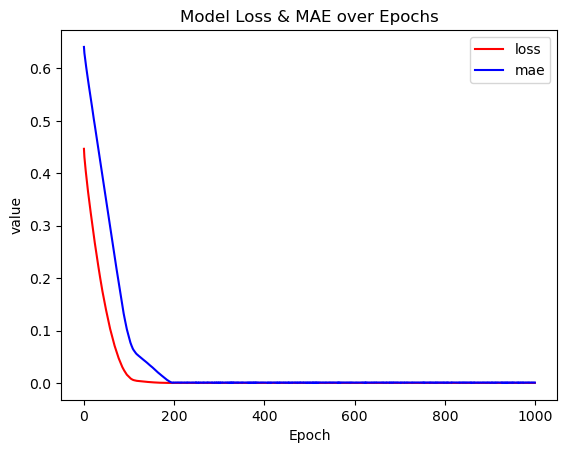

In [14]:
plt.plot(hist.history['loss'], 'r', label='loss')
plt.plot(hist.history['mae'], 'b', label='mae')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('value')
plt.title('Model Loss & MAE over Epochs')
plt.show()

In [15]:
# 7. 모델 사용하기
model.predict(np.array([[0],
                       [0.01]]))

1/1 [==============================] - 0s 16ms/step


array([[0.3207085],
       [0.3387209]], dtype=float32)

In [16]:
model.save('model/after_learning.h5')

In [17]:
# 실제값 : scaled_data_f 
# 예측값 : y_hat
y_hat = model.predict([scaled_data_c])
for y, h in zip(scaled_data_f, y_hat):
    print(f"실제값:{round(y*100,1)}, 예측값:{round(h[0]*100,1)}")

4/4 [==============================] - 0s 0s/step
실제값:32.0, 예측값:32.1
실제값:33.8, 예측값:33.9
실제값:35.6, 예측값:35.7
실제값:37.4, 예측값:37.5
실제값:39.2, 예측값:39.3
실제값:41.0, 예측값:41.1
실제값:42.8, 예측값:42.9
실제값:44.6, 예측값:44.7
실제값:46.4, 예측값:46.5
실제값:48.2, 예측값:48.3
실제값:50.0, 예측값:50.1
실제값:51.8, 예측값:51.9
실제값:53.6, 예측값:53.7
실제값:55.4, 예측값:55.5
실제값:57.2, 예측값:57.3
실제값:59.0, 예측값:59.1
실제값:60.8, 예측값:60.9
실제값:62.6, 예측값:62.7
실제값:64.4, 예측값:64.5
실제값:66.2, 예측값:66.3
실제값:68.0, 예측값:68.1
실제값:69.8, 예측값:69.9
실제값:71.6, 예측값:71.7
실제값:73.4, 예측값:73.5
실제값:75.2, 예측값:75.3
실제값:77.0, 예측값:77.1
실제값:78.8, 예측값:78.9
실제값:80.6, 예측값:80.7
실제값:82.4, 예측값:82.5
실제값:84.2, 예측값:84.3
실제값:86.0, 예측값:86.1
실제값:87.8, 예측값:87.9
실제값:89.6, 예측값:89.7
실제값:91.4, 예측값:91.5
실제값:93.2, 예측값:93.3
실제값:95.0, 예측값:95.1
실제값:96.8, 예측값:96.9
실제값:98.6, 예측값:98.7
실제값:100.4, 예측값:100.5
실제값:102.2, 예측값:102.3
실제값:104.0, 예측값:104.1
실제값:105.8, 예측값:105.9
실제값:107.6, 예측값:107.7
실제값:109.4, 예측값:109.5
실제값:111.2, 예측값:111.3
실제값:113.0, 예측값:113.1
실제값:114.8, 예측값:114.9
실제값:116.6, 예측값:116.7
실제값:118.4, 예측값:118

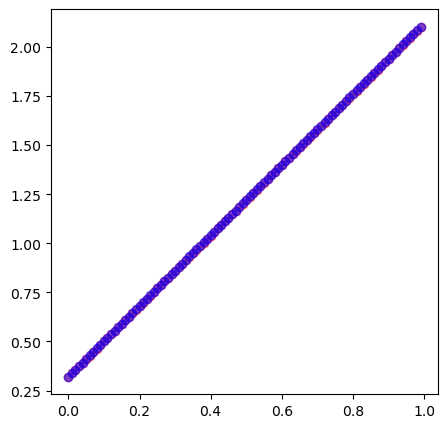

In [18]:
plt.figure(figsize=(5,5))
plt.scatter(x=scaled_data_c,
           y=scaled_data_f, c='r', alpha=0.5)
plt.scatter(x=scaled_data_c, y=y_hat, c='b', alpha=0.5)
plt.show()

## 2.2 노이즈가 있는 데이터로 실습

In [19]:
# 평균이 0이고 표준편차가 0.1인 데이터 100
np.random.seed(7)
noise = np.random.normal(loc=0, scale=0.1, size=100)
# print(noise)
# print(scaled_data_f)
scaled_data_f = scaled_data_f + noise

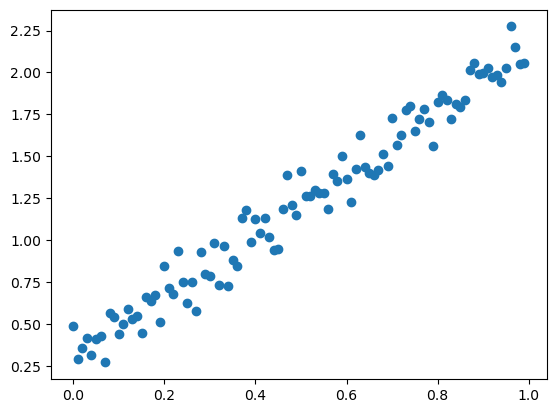

In [20]:
plt.scatter(x=scaled_data_c, y=scaled_data_f)
plt.show()

In [21]:
# 3. 모델 구성
model2 = Sequential()
model2.add(Dense(1, input_shape=(1,)))

# 4. 모델 학습과정 설정
model2.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
# 5. 학습시키기
hist2 = model2.fit(scaled_data_c, scaled_data_f, epochs=1000, verbose=2)

Epoch 1/1000
4/4 - 0s - loss: 0.4436 - mae: 0.6295 - 285ms/epoch - 71ms/step
Epoch 2/1000
4/4 - 0s - loss: 0.4290 - mae: 0.6186 - 16ms/epoch - 4ms/step
Epoch 3/1000
4/4 - 0s - loss: 0.4182 - mae: 0.6102 - 16ms/epoch - 4ms/step
Epoch 4/1000
4/4 - 0s - loss: 0.4088 - mae: 0.6029 - 16ms/epoch - 4ms/step
Epoch 5/1000
4/4 - 0s - loss: 0.4006 - mae: 0.5965 - 16ms/epoch - 4ms/step
Epoch 6/1000
4/4 - 0s - loss: 0.3924 - mae: 0.5899 - 16ms/epoch - 4ms/step
Epoch 7/1000
4/4 - 0s - loss: 0.3847 - mae: 0.5837 - 16ms/epoch - 4ms/step
Epoch 8/1000
4/4 - 0s - loss: 0.3774 - mae: 0.5778 - 22ms/epoch - 6ms/step
Epoch 9/1000
4/4 - 0s - loss: 0.3711 - mae: 0.5726 - 16ms/epoch - 4ms/step
Epoch 10/1000
4/4 - 0s - loss: 0.3642 - mae: 0.5669 - 0s/epoch - 0s/step
Epoch 11/1000
4/4 - 0s - loss: 0.3570 - mae: 0.5609 - 0s/epoch - 0s/step
Epoch 12/1000
4/4 - 0s - loss: 0.3500 - mae: 0.5550 - 16ms/epoch - 4ms/step
Epoch 13/1000
4/4 - 0s - loss: 0.3432 - mae: 0.5492 - 16ms/epoch - 4ms/step
Epoch 14/1000
4/4 - 0s - 

4/4 - 0s - loss: 0.0165 - mae: 0.1052 - 16ms/epoch - 4ms/step
Epoch 111/1000
4/4 - 0s - loss: 0.0162 - mae: 0.1040 - 16ms/epoch - 4ms/step
Epoch 112/1000
4/4 - 0s - loss: 0.0159 - mae: 0.1031 - 0s/epoch - 0s/step
Epoch 113/1000
4/4 - 0s - loss: 0.0157 - mae: 0.1023 - 0s/epoch - 0s/step
Epoch 114/1000
4/4 - 0s - loss: 0.0155 - mae: 0.1016 - 22ms/epoch - 6ms/step
Epoch 115/1000
4/4 - 0s - loss: 0.0153 - mae: 0.1010 - 0s/epoch - 0s/step
Epoch 116/1000
4/4 - 0s - loss: 0.0153 - mae: 0.1008 - 16ms/epoch - 4ms/step
Epoch 117/1000
4/4 - 0s - loss: 0.0152 - mae: 0.1003 - 16ms/epoch - 4ms/step
Epoch 118/1000
4/4 - 0s - loss: 0.0151 - mae: 0.1001 - 16ms/epoch - 4ms/step
Epoch 119/1000
4/4 - 0s - loss: 0.0149 - mae: 0.0993 - 0s/epoch - 0s/step
Epoch 120/1000
4/4 - 0s - loss: 0.0148 - mae: 0.0986 - 0s/epoch - 0s/step
Epoch 121/1000
4/4 - 0s - loss: 0.0146 - mae: 0.0979 - 16ms/epoch - 4ms/step
Epoch 122/1000
4/4 - 0s - loss: 0.0145 - mae: 0.0976 - 16ms/epoch - 4ms/step
Epoch 123/1000
4/4 - 0s - los

4/4 - 0s - loss: 0.0107 - mae: 0.0813 - 16ms/epoch - 4ms/step
Epoch 219/1000
4/4 - 0s - loss: 0.0107 - mae: 0.0811 - 0s/epoch - 0s/step
Epoch 220/1000
4/4 - 0s - loss: 0.0106 - mae: 0.0811 - 16ms/epoch - 4ms/step
Epoch 221/1000
4/4 - 0s - loss: 0.0106 - mae: 0.0811 - 16ms/epoch - 4ms/step
Epoch 222/1000
4/4 - 0s - loss: 0.0106 - mae: 0.0809 - 0s/epoch - 0s/step
Epoch 223/1000
4/4 - 0s - loss: 0.0106 - mae: 0.0811 - 16ms/epoch - 4ms/step
Epoch 224/1000
4/4 - 0s - loss: 0.0106 - mae: 0.0807 - 16ms/epoch - 4ms/step
Epoch 225/1000
4/4 - 0s - loss: 0.0106 - mae: 0.0809 - 16ms/epoch - 4ms/step
Epoch 226/1000
4/4 - 0s - loss: 0.0106 - mae: 0.0811 - 16ms/epoch - 4ms/step
Epoch 227/1000
4/4 - 0s - loss: 0.0106 - mae: 0.0812 - 16ms/epoch - 4ms/step
Epoch 228/1000
4/4 - 0s - loss: 0.0106 - mae: 0.0812 - 0s/epoch - 0s/step
Epoch 229/1000
4/4 - 0s - loss: 0.0106 - mae: 0.0810 - 22ms/epoch - 6ms/step
Epoch 230/1000
4/4 - 0s - loss: 0.0105 - mae: 0.0811 - 16ms/epoch - 4ms/step
Epoch 231/1000
4/4 - 0s

Epoch 326/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 16ms/epoch - 4ms/step
Epoch 327/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0803 - 16ms/epoch - 4ms/step
Epoch 328/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0802 - 0s/epoch - 0s/step
Epoch 329/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0803 - 0s/epoch - 0s/step
Epoch 330/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0803 - 16ms/epoch - 4ms/step
Epoch 331/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0801 - 16ms/epoch - 4ms/step
Epoch 332/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0800 - 16ms/epoch - 4ms/step
Epoch 333/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0802 - 7ms/epoch - 2ms/step
Epoch 334/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 16ms/epoch - 4ms/step
Epoch 335/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0801 - 16ms/epoch - 4ms/step
Epoch 336/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0803 - 16ms/epoch - 4ms/step
Epoch 337/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0803 - 0s/epoch - 0s/step
Epoch 338/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0803 - 16ms/epoch - 4ms/step
Epoch 339

Epoch 434/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 0s/epoch - 0s/step
Epoch 435/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 16ms/epoch - 4ms/step
Epoch 436/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 16ms/epoch - 4ms/step
Epoch 437/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 16ms/epoch - 4ms/step
Epoch 438/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 16ms/epoch - 4ms/step
Epoch 439/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 16ms/epoch - 4ms/step
Epoch 440/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0803 - 7ms/epoch - 2ms/step
Epoch 441/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0803 - 16ms/epoch - 4ms/step
Epoch 442/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 16ms/epoch - 4ms/step
Epoch 443/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 0s/epoch - 0s/step
Epoch 444/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 0s/epoch - 0s/step
Epoch 445/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 16ms/epoch - 4ms/step
Epoch 446/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 16ms/epoch - 4ms/step
Epoch 447

Epoch 542/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 16ms/epoch - 4ms/step
Epoch 543/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 16ms/epoch - 4ms/step
Epoch 544/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 16ms/epoch - 4ms/step
Epoch 545/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 16ms/epoch - 4ms/step
Epoch 546/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 22ms/epoch - 6ms/step
Epoch 547/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 16ms/epoch - 4ms/step
Epoch 548/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0808 - 16ms/epoch - 4ms/step
Epoch 549/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 16ms/epoch - 4ms/step
Epoch 550/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 16ms/epoch - 4ms/step
Epoch 551/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 16ms/epoch - 4ms/step
Epoch 552/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0808 - 16ms/epoch - 4ms/step
Epoch 553/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0808 - 16ms/epoch - 4ms/step
Epoch 554/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0810 - 16ms/epoch - 4ms/step

Epoch 650/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 16ms/epoch - 4ms/step
Epoch 651/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 0s/epoch - 0s/step
Epoch 652/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 0s/epoch - 0s/step
Epoch 653/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 16ms/epoch - 4ms/step
Epoch 654/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 22ms/epoch - 6ms/step
Epoch 655/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 0s/epoch - 0s/step
Epoch 656/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 16ms/epoch - 4ms/step
Epoch 657/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 16ms/epoch - 4ms/step
Epoch 658/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 16ms/epoch - 4ms/step
Epoch 659/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 16ms/epoch - 4ms/step
Epoch 660/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 16ms/epoch - 4ms/step
Epoch 661/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 16ms/epoch - 4ms/step
Epoch 662/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 7ms/epoch - 2ms/step
Epoch 663

Epoch 758/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 16ms/epoch - 4ms/step
Epoch 759/1000
4/4 - 0s - loss: 0.0104 - mae: 0.0804 - 7ms/epoch - 2ms/step
Epoch 760/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 16ms/epoch - 4ms/step
Epoch 761/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 16ms/epoch - 4ms/step
Epoch 762/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0802 - 16ms/epoch - 4ms/step
Epoch 763/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 0s/epoch - 0s/step
Epoch 764/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0803 - 0s/epoch - 0s/step
Epoch 765/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 16ms/epoch - 4ms/step
Epoch 766/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 16ms/epoch - 4ms/step
Epoch 767/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 0s/epoch - 0s/step
Epoch 768/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 0s/epoch - 0s/step
Epoch 769/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 16ms/epoch - 4ms/step
Epoch 770/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 16ms/epoch - 4ms/step
Epoch 771/10

Epoch 866/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0810 - 16ms/epoch - 4ms/step
Epoch 867/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0809 - 16ms/epoch - 4ms/step
Epoch 868/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0811 - 7ms/epoch - 2ms/step
Epoch 869/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0811 - 0s/epoch - 0s/step
Epoch 870/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0810 - 16ms/epoch - 4ms/step
Epoch 871/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 16ms/epoch - 4ms/step
Epoch 872/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 16ms/epoch - 4ms/step
Epoch 873/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 16ms/epoch - 4ms/step
Epoch 874/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 0s/epoch - 0s/step
Epoch 875/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 7ms/epoch - 2ms/step
Epoch 876/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 16ms/epoch - 4ms/step
Epoch 877/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 16ms/epoch - 4ms/step
Epoch 878/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 0s/epoch - 0s/step
Epoch 879/

Epoch 974/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0809 - 16ms/epoch - 4ms/step
Epoch 975/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 22ms/epoch - 6ms/step
Epoch 976/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 0s/epoch - 0s/step
Epoch 977/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0808 - 0s/epoch - 0s/step
Epoch 978/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0810 - 0s/epoch - 0s/step
Epoch 979/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 0s/epoch - 0s/step
Epoch 980/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0809 - 0s/epoch - 0s/step
Epoch 981/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0808 - 16ms/epoch - 4ms/step
Epoch 982/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 22ms/epoch - 6ms/step
Epoch 983/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0808 - 16ms/epoch - 4ms/step
Epoch 984/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0809 - 16ms/epoch - 4ms/step
Epoch 985/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0808 - 16ms/epoch - 4ms/step
Epoch 986/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0809 - 16ms/epoch - 4ms/step
Epoch 987/1000

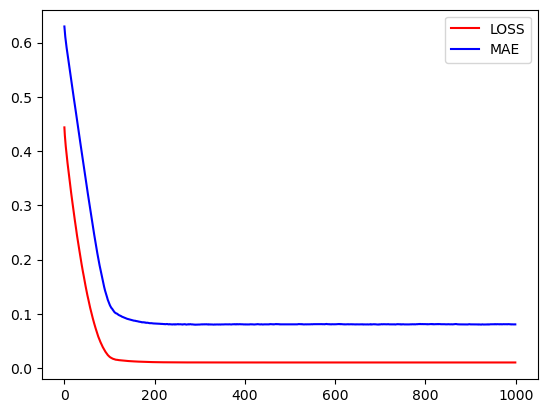

In [23]:
# 6. 평가하기
plt.plot(hist2.history['loss'], 'r', label='LOSS')
plt.plot(hist2.history['mae'], 'b', label='MAE')
plt.legend()
plt.show()

In [24]:
# 7. 예측하기
model2.predict(np.array([[0],
                        [0.01]]))

1/1 [==============================] - 0s 38ms/step


array([[0.30221352],
       [0.32058096]], dtype=float32)

In [25]:
y_hat2 = model2.predict([scaled_data_c])

4/4 [==============================] - 0s 0s/step


In [26]:
for h, y in zip(y_hat2, scaled_data_f):
    print(f'예측: {h}, 실제: {y}')

예측: [0.30221352], 실제: 0.48905257038003563
예측: [0.32058096], 실제: 0.2914062629459167
예측: [0.33894837], 실제: 0.3592820163678585
예측: [0.3573158], 실제: 0.4147516282996508
예측: [0.37568322], 실제: 0.31310769713742614
예측: [0.39405066], 실제: 0.4102065572905948
예측: [0.41241807], 실제: 0.42791096141420687
예측: [0.4307855], 실제: 0.2705275693654579
예측: [0.44915295], 실제: 0.5657658005663493
예측: [0.46752036], 실제: 0.542049851591955
예측: [0.4858878], 실제: 0.43745710260332404
예측: [0.50425524], 실제: 0.5008451738804279
예측: [0.52262264], 실제: 0.5865299374196752
예측: [0.54099005], 실제: 0.5278643584808353
예측: [0.5593575], 실제: 0.5477250921327455
예측: [0.57772493], 실제: 0.44467585875092086
예측: [0.59609234], 실제: 0.6634580311891888
예측: [0.61445975], 실제: 0.6383880905287038
예측: [0.6328272], 실제: 0.6714459923759963
예측: [0.65119463], 실제: 0.509347546813016
예측: [0.6695621], 실제: 0.8450699691186476
예측: [0.6879295], 실제: 0.7134335535456359
예측: [0.7062969], 실제: 0.6772860056713612
예측: [0.72466433], 실제: 0.9369072220761113
예측: [0.74303174], 실제:

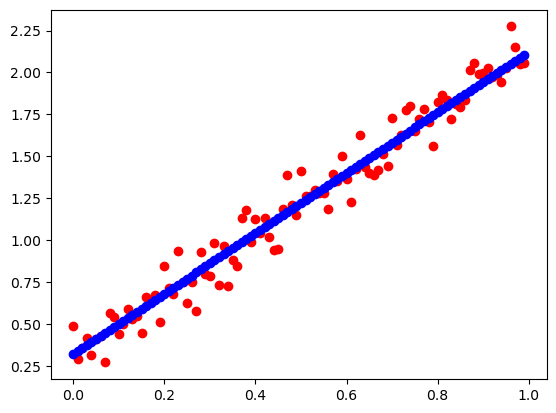

In [27]:
plt.scatter(x=scaled_data_c,
           y=scaled_data_f,
           c='r')
plt.scatter(x=scaled_data_c,
          y=y_hat,
          c='b')
plt.show()